# ◈ 데이터 분석 준비

## 1) Colab 환경 설정

In [ ]:
# 시각화 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 트리맵
!pip install squarify

# 요인분석
!pip install pingouin factor_analyzer

# 연관분석
!pip install -U apyori mlxtend

## 2) 필수 라이브러리 로드

In [95]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from patsy import demo_data, dmatrix, dmatrices

## 3) 글로벌 환경 설정

In [96]:
#%precision 3 # np 정확도를 소숫점 3자리로 고정
%matplotlib inline
sns.set_theme()

# plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 5)

sns_color = sns.color_palette('pastel')
plt_line = ['-', '--', ':', '-.']

## 4) 분석 데이터 로드

In [97]:
cars93 = pd.read_csv('https://github.com/ksky1313/ADP/raw/main/data/cars93.csv')
cars93.drop(columns=cars93.columns[0], inplace=True)
# df = cars93

from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df['PRICES'] = boston.target
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


# ◈ 단순 선형회귀

## 1) statsmodels OLS

In [98]:
y, X = dmatrices('PRICES~RM', df, return_type='dataframe')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=10)

In [99]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

# 예측
y_pred = model.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                 PRICES   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     311.9
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           4.46e-52
Time:                        00:46:40   Log-Likelihood:                -1334.6
No. Observations:                 404   AIC:                             2673.
Df Residuals:                     402   BIC:                             2681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.0582      3.070    -10.443      0.0

## 2) LinearRegression

In [100]:
X = df[['RM']]
y = df[['PRICES']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=10)

In [101]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
print(f'coef : {model.coef_}, intercept : {model.intercept_}')

# 예측
y_pred = model.predict(X_test)

print(f'학습 정확도: {model.score(X_train, y_train):.2f}')
print(f'예측 정확도: {model.score(X_test, y_test):.2f}')

coef : [[8.63905126]], intercept : [-32.05815002]
학습 정확도: 0.44
예측 정확도: 0.56


## 3) Numpy poly1d

In [102]:
reg = np.poly1d(np.polyfit(X_train.RM, y_train.PRICES, 1))
np_pred = reg(X_test)

reg

poly1d([  8.63905126, -32.05815002])

# ◈ 다중 선형회귀

## 1) statsmodels OLS

In [103]:
y, X = dmatrices('PRICES~' + '+'.join(df.columns[:-1]), df, return_type='dataframe')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=10)

In [104]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

# 예측
y_pred = model.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                 PRICES   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     90.06
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          1.12e-108
Time:                        00:46:40   Log-Likelihood:                -1170.5
No. Observations:                 404   AIC:                             2369.
Df Residuals:                     390   BIC:                             2425.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.5331      5.428      6.730      0.0

## 2) LinearRegression

In [105]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
print(f'coef : {model.coef_}, intercept : {model.intercept_}')

# 예측
y_pred = model.predict(X_test)

print(f'학습 정확도: {model.score(X_train, y_train):.2f}')
print(f'예측 정확도: {model.score(X_test, y_test):.2f}')

coef : [[ 0.00000000e+00 -1.28180656e-01  6.31981786e-02 -7.57627602e-03
   1.97451452e+00 -1.62719890e+01  3.10845625e+00  1.62922153e-02
  -1.48301360e+00  3.03988206e-01 -1.20820710e-02 -8.20305699e-01
   1.14189890e-02 -5.81626431e-01]], intercept : [36.53305138]
학습 정확도: 0.75
예측 정확도: 0.67


# ◈ 정규화 선형회귀

## 1) Lasso
- L1 규제 : 가중치 절대값 합을 최소화하는 제약조건 초가
  - 중요하지 않은 가중치는 0이 될 수 있음
  - 상관관계가 많으면 모델성능 저하됨
- α : 규제 가중치, default=1
  - α가 적어지면 규제가 작아지고 과대적합
  - α가 커지면 규제가 커지고 과소적합

In [106]:
from sklearn.linear_model import Lasso

model = Lasso(
    alpha=1, # default 1
    max_iter=10000 # default 1000
    ) 
model.fit(X_train, y_train)

# 성능 평가
print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.689
예측 정확도: 0.535


## 2) Ridge
- L2 규제 : 가중치 제곱합을 최소화하는 것을 제약으로 추가
  - 가중치가 0에 가까워지는 것을 요구(실제 0이 되지는 않음)
- α : 규제 가중치, default=1
  - α가 적어지면 규제가 작아지고 과대적합
  - α가 커지면 규제가 커지고 과소적합

In [107]:
from sklearn.linear_model import Ridge

model = Ridge(
    alpha=1, # default = 1 
    solver='auto', # 'auto', 'lsqr', 'svd', 'cholesky', 데이터가 많고 스케일된 데이터 = ['sag', 'saga']
    max_iter=10000 # default 1000
    ) 
model.fit(X_train, y_train)

# 성능 평가
print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.748
예측 정확도: 0.666


## 3) ElasticNet
- 가중치 절대값과 제곱합을 동시에 제약을 가짐

In [108]:
from sklearn.linear_model import ElasticNet

model = make_pipeline(
    StandardScaler(),
    ElasticNet(
        alpha = 0.5, # default 1
        l1_ratio = 0.7 # default 0.5
        )
    ).fit(X_train, y_train)
         
# 성능 평가
print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.696
예측 정확도: 0.636


# ◈ Ensemble

## 1) Bagging

### 가) BaggingRegressor

In [114]:
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    BaggingRegressor()
    ).fit(X_train, y_train)

print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.963
예측 정확도: 0.860


### 나) RandomForestRegressor

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
    ).fit(X_train, y_train)

print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.977
예측 정확도: 0.857


### 다) ExtraTreesRegressor

In [116]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
    ).fit(X_train, y_train)

print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 1.000
예측 정확도: 0.885


## 2) Boosting

### 가) AdaBoostRegressor

In [138]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
    ).fit(X_train, y_train)

print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.908
예측 정확도: 0.847


### 나) GradientBoostingRegressor

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
    ).fit(X_train, y_train)

print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.978
예측 정확도: 0.882


## 3) VotingRegressor
- 서로 다른 모델들의 결과를 투표를 통해 결합

In [144]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import VotingRegressor

vote_model = VotingRegressor(
    estimators = [
        ('svr', SVR()),
        ('tree', DecisionTreeRegressor()),
        ('elasticnet', ElasticNet())
        ],
    weights = [1, 1, 1]
)

model = make_pipeline(
    StandardScaler(),
    vote_model
    ).fit(X_train, y_train)

print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.857
예측 정확도: 0.695


## 4) Stacked Generalization
- 각 모델의 예측 값을 최종 모델의 입력으로 사용
- 모델의 편향을 줄이는데 효과적

In [150]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor

stcak_model = StackingRegressor(
    estimators = [
      ('svr', SVR()),
      ('tree', DecisionTreeRegressor()),
      ('elasticnet', ElasticNet())
      ],
    final_estimator = GradientBoostingRegressor()
)

model = make_pipeline(
    StandardScaler(),
    stcak_model
    ).fit(X_train, y_train)

print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.918
예측 정확도: 0.674


# ◈ 기타 선형회귀

## 1) SGDRegressor

In [109]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    SGDRegressor(
        penalty='l1',
        max_iter = 50, 
        alpha = 0.001, 
        early_stopping = True, 
        verbose = False, 
        random_state = 1, 
        n_iter_no_change = 3
        )
    ).fit(X_train, y_train)

# 성능 평가
print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.747
예측 정확도: 0.674


## 2) MLPRegressor

In [110]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    MLPRegressor(
        max_iter = 5000, 
        alpha = 0.1, 
        verbose = False, 
        early_stopping = True,
        hidden_layer_sizes = (100, 10) # 첫번째, 두번째 은닉층수
        )
    ).fit(X_train, y_train)

# 성능 평가
print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.855
예측 정확도: 0.860


## 3) KNeighborsRegressor

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(
        n_neighbors = 5, # 늘리면 과소적합, 줄이면 과대적합
        )
    ).fit(X_train, y_train)

print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.851
예측 정확도: 0.674


## 4) SVR

In [112]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    SVR()
    ).fit(X_train, y_train)

print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 0.679
예측 정확도: 0.554


## 5) DecisitonTreeRegressor

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
    ).fit(X_train, y_train)

print(f'모델 정확도: {model.score(X_train, y_train):.3f}')
print(f'예측 정확도: {model.score(X_test, y_test):.3f}')

모델 정확도: 1.000
예측 정확도: 0.672


# ◈ 회귀모형 평가

## 1) 모형 적합도 평가
- R-Squared : 1에 가까울 수록 설명력 높음
- Adj. R-squared : 독립변수가 많으면 패널티 부여
- F-statistic : (모델 적합도) 전체 결정계수가 모두 0 이라는 귀무가설을 검정
- Prob(F-statistic) : F-statistic Pvale, 0.05 보다 작으면 기각 --> 모델 적합
- AIC, BIC : (모델 예측 성능) 작을수록 예측력이 높음


## 2) 회귀계수 평가
- coef : 회귀계수
- std err : 추정값의 표준오차
- t : 회귀계수 T-검정값, 회귀계수가 0 이라는 귀무가설 검정
- P >|t| : T-검정 Pvalue, 0.05보다 작으면 기각 --> 회귀계수 유효
- 0.025, 0.975 : 회귀계수 95% 신뢰구간

## 3) 모형 타당성 평가
- 정규성 검정
  - Omibus, Jarque-Bera : 잔차항은 정규분포라는 귀무가설을 검정
  - Prob(Omnibus), Prob(JB) : 0.05보다 크면 정규분포
  - Skew(왜도) : 양수면 오른쪽 긴꼬리, 음수면 왼쪽 긴꼬리
  - Kurtosis(첨도)
- 독립성 검정
  - Durbin-Watson : 2면 독립, 0이면 양의상관, 4면 음의상관
- 다중공선성 검정
  - Cond. No : 조건수의 값이 크면 다중공선성 발생

## 4) 모형 성능 평가
- MSE, RMSE 이용 : 작을수록 추정 정확성이 높음
- r2_score : 0~1, 1에 가까울수록 선형회귀 모델이 데이터에 높은 연관성을 갖음

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.DataFrame(data = {
    'mae' : [mean_absolute_error(y_test, y_pred)],
    'mse' : [mean_squared_error(y_test, y_pred)],
    'rmse' : [np.sqrt(mean_absolute_error(y_test, y_pred))],
    'r2' : [r2_score(y_test, y_pred)]})

,mae,mse,rmse,r2
0,4.061419,34.413968,2.015296,0.670934


# ◈ 회귀모형 가정



## 1) 선형성
- 독립변수와 종속변수 사이에 선형관계가 성립
- 검정 : 상관관계
- 시각화 : heatmap, pairplot

## 2) 잔차의 독립성
- 잔차끼리 상관을 보이면 과대 추정하게 되고 R-Squsred를 증가시킴
- 검정 : Durbin-Watson(0~4) : 2에 가까울수록 독립적, 0에 가까우면 양, 4에가까우면 음의 상관성
- 시각화 : 잔차의 산점도(패턴이 있으면 안됨)

## 3) 잔차의 정규성
- 잔차의 분포가 정규분포에 따른다
- 검정 : Shapiro-Wilk, Kolmogolov-Smirnov, Omibus, Jarque-Bera
- 시각화 : Q-Q Plot
    - Skew(왜도) : 양수면 오른쪽 긴꼬리, 음수면 왼쪽 긴꼬리
    - Kurtosis(첨도) : 정규분포는 3

In [119]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

# 예측
y_pred = model.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                 PRICES   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     90.06
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          1.12e-108
Time:                        00:46:43   Log-Likelihood:                -1170.5
No. Observations:                 404   AIC:                             2369.
Df Residuals:                     390   BIC:                             2425.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.5331      5.428      6.730      0.0

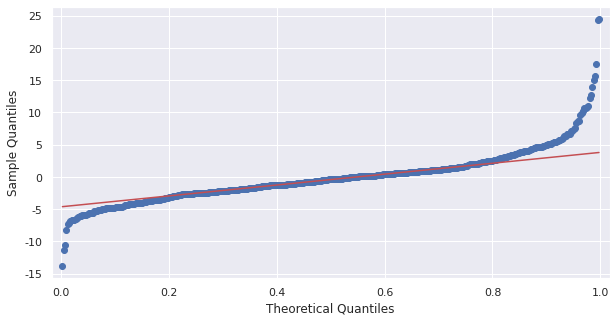

[shapiro] (H0)정규분포에 따른다: False, pvalue = 0.0000


In [120]:
flg, ax = plt.subplots(figsize=(10,5))
sm.qqplot(
    model.resid,
    line='q',
    dist=stats.uniform,
    ax=ax
    )
plt.show()

stat, pvalue = stats.shapiro(model.resid)
print(f'[shapiro] (H0)정규분포에 따른다: {pvalue>0.05}, pvalue = {pvalue:.4f}')

## 4) 잔차의 등분산성
- 잔차의 분산은 회귀선의 모든 값에서 동질적
- 시각화 : sns.residplot()

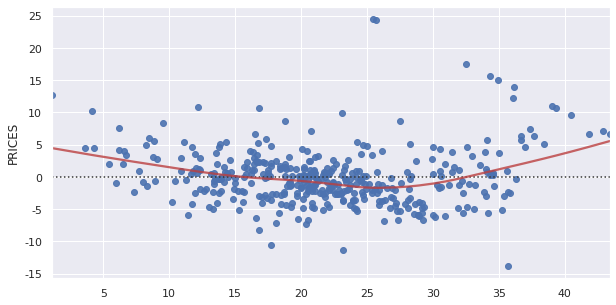

In [121]:
sns.residplot(
    data = X_train,
    x = model.fittedvalues, 
    y = y_train, 
    lowess = True,
    scatter_kws ={'alpha':.9},
    line_kws ={'color':'#bb3f3f', 'alpha':.8},
    );

# ◈ 회귀모형 최적화

## 1) 관측치 비정상성
- 레버리지, 아웃라이어를 분석하여 영향력 높은 관측치를 식별하고 모형 개선
  - Leverage : 실제 종속변수값 y가 예측치에 미치는 영향을 나타낸 값
  - Outlier : 잔차가 큰 데이터(표준화 잔차가 2~4 이상)

- Cook's Distance : 레버리지와 잔차를 동시에 보기 위한 기준
  - 일반적으로 4/N 보다 크면 영향력 높은 것으로 간주

### 가) Leverage 분석

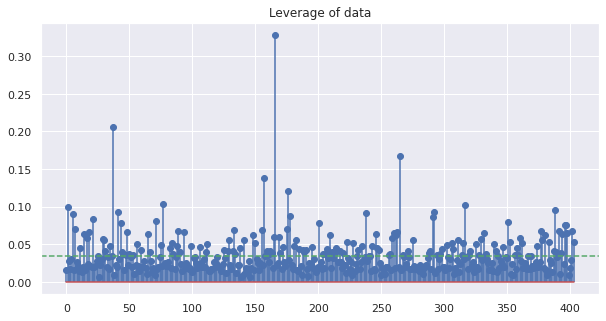

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,1.0,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.9,17.21


In [122]:
hat = model.get_influence().hat_matrix_diag
plt.stem(
    hat, 
    use_line_collection=True
    )
plt.axhline(hat.mean(), c="g", ls="--")
plt.title("Leverage of data")
plt.show()

# Leverage 높은 관측치 추출
X_train[hat > 0.3]

### 나) Outlier 분석

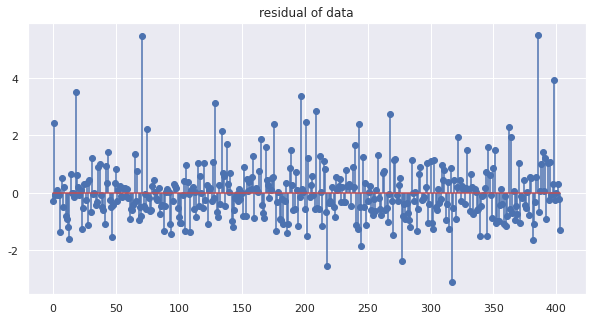

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
368,1.0,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
371,1.0,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53


In [123]:
plt.stem(
    model.resid_pearson, 
    use_line_collection=True
    )
plt.title("residual of data")
plt.show()

# 아웃라이어 추출
X_train[abs(model.resid_pearson) > 4]

### 다) Cook's Distance 분석

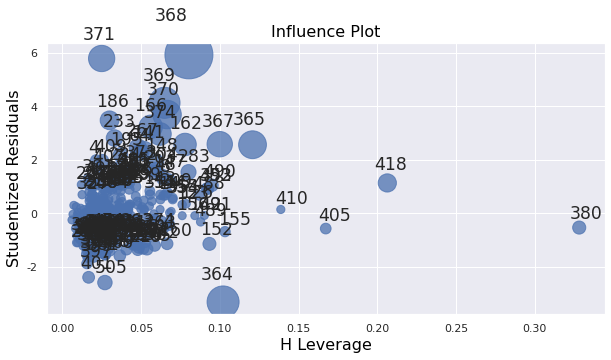

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
367,1.0,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
370,1.0,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
368,1.0,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
365,1.0,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
364,1.0,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29
371,1.0,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
369,1.0,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73


In [124]:
cooks = model.get_influence().cooks_distance[0]
fig, ax = plt.subplots()
# ax.set_ylim(-4, 8)
sm.graphics.influence_plot(
    model, 
    alpha  = 0.5, 
    criterion="cooks",
    ax = ax, 
    )
plt.show()

# Cook's Distance 큰 값 추출
# X_train[cooks > 4/len(X_train)]
X_train[cooks > 0.05]

### 라) 영향력 높은 관측치 제거

In [125]:
X_train.drop(index=[18, 27, 58], inplace=False)

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,1.0,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,1.0,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.0,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,1.0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,1.0,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,1.0,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,1.0,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,1.0,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,1.0,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


## 2) 다중공선성
- 다중 공선성이 있으면 공분산 행렬의 조건수(Cond. NO가 증가)
- 확인방법 : 상관관계, VIF 검증
- 해결방법
  - 변수선택법으로 의존적인 변수 삭제
  - PCA로 의존 성분 삭제
  - 정규화 사용

### 가) 시각화 - Heatmap

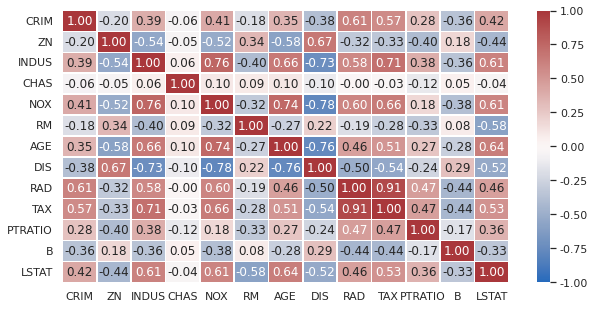

In [126]:
sns.heatmap(
    data = X_train.iloc[:,1:].corr(),
    annot = True,
    vmax = 1,
    vmin = -1,
    cmap = 'vlag', # 'RdYlBu_r', 'vlag', 'coolwarm'
    linewidths=.5,
    fmt='.2f'
    );

### 나) VIF 검증
- 10 보다 크면 변수에 다중공선성이 존재

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = X_train.iloc[:,1:]

# 다중 공선성 확인
vif = pd.DataFrame({
    'feature' : df_vif.columns,
    'VIF Factor' : [ variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1]) ]
  })

vif.sort_values('VIF Factor', ascending=False).T

,10,5,4,9,6,11,8,7,2,12,1,0,3
feature,PTRATIO,RM,NOX,TAX,AGE,B,RAD,DIS,INDUS,LSTAT,ZN,CRIM,CHAS
VIF Factor,92.761813,79.344821,71.412368,57.828943,23.654323,17.973471,15.086049,14.989209,14.806033,11.677554,2.857019,2.02585,1.156001


## 3) 변수선택

### 가) 전진/후진/단계적

> 전진선택법

In [128]:
def processSubset(X,y,feature_set):
    model = sm.OLS(y, X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

def forward(X,y,predictors):
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors :
    	results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['Intercept']))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()]
    print("Processed ",models.shape[0], "models on", len(predictors)+1)
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC:",best_model[1])
    return best_model
    
def forward_model(X,y):
    X['Intercept'] = np.ones([X.shape[0], 1])

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    
    predictors = []
    
    for i in range(1,len(X.columns.difference(['Intercept']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1 :
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'Intercept']
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [129]:
f_model = forward_model(X=X_train.iloc[:, 1:], y=y_train)

Processed  13 models on 1
Selected predictors: ['LSTAT', 'Intercept'] AIC: 2572.8439832850777
Processed  12 models on 2
Selected predictors: ['LSTAT', 'RM', 'Intercept'] AIC: 2498.538927996122
Processed  11 models on 3
Selected predictors: ['LSTAT', 'RM', 'PTRATIO', 'Intercept'] AIC: 2456.964324573397
Processed  10 models on 4
Selected predictors: ['LSTAT', 'RM', 'PTRATIO', 'B', 'Intercept'] AIC: 2437.1440476126895
Processed  9 models on 5
Selected predictors: ['LSTAT', 'RM', 'PTRATIO', 'B', 'DIS', 'Intercept'] AIC: 2419.167380037272
Processed  8 models on 6
Selected predictors: ['LSTAT', 'RM', 'PTRATIO', 'B', 'DIS', 'NOX', 'Intercept'] AIC: 2405.9320471147958
Processed  7 models on 7
Selected predictors: ['LSTAT', 'RM', 'PTRATIO', 'B', 'DIS', 'NOX', 'ZN', 'Intercept'] AIC: 2395.0778092045934
Processed  6 models on 8
Selected predictors: ['LSTAT', 'RM', 'PTRATIO', 'B', 'DIS', 'NOX', 'ZN', 'CRIM', 'Intercept'] AIC: 2388.332481398548
Processed  5 models on 9
Selected predictors: ['LSTAT'

> 후진선택법

In [130]:
import itertools

def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling    
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

def backward(X,y,predictors):
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X,y=y,feature_set=list(combo)))

    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()]
    
    print("Processed ",models.shape[0], "models on", len(predictors) - 1)
    print("Selected predictors:",best_model['model'].model.exog_names,' AIC:',best_model[1])
    return best_model
    
def backward_model(X,y) :
    X['Intercept'] = np.ones([X.shape[0], 1])

    Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
    predictors = X.columns#.difference(['Intercept'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X, y, predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before :
            break
        Bmodels.loc[len(predictors) -1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result["AIC"]
        predictors = [k for k in predictors if k != 'Intercept']

    return (Bmodels["model"].dropna().iloc[0])

In [131]:
b_model = backward_model(X=X_train.iloc[:, 1:], y=y_train)

Processed  14 models on 13
Selected predictors: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Intercept']  AIC: 2366.9496779102583
Processed  12 models on 11
Selected predictors: ['CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']  AIC: 2407.6266859066563


> 단계적 방법

In [132]:
def Stepwise_model(X,y):
    X['Intercept'] = np.ones([X.shape[0], 1])

    Stepmodels = pd.DataFrame(columns = ["AIC","model"])
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['Intercept'])['AIC']
    
    for i in range(1,len(X.columns.difference(['Intercept']))+1) :
        Forward_result = forward(X=X,y=y,predictors = predictors) # Interceptant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names

        Backward_result = backward(X=X,y=y,predictors = predictors)
        if Backward_result["AIC"] < Forward_result["AIC"]:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [k for k in predictors if k != "Intercept"]
            print('backward')
        if Stepmodels.loc[i]["AIC"] > Smodel_before:
            break
        else :
            Smodel_before = Stepmodels.loc[i]["AIC"]

    return (Stepmodels["model"][len(Stepmodels["model"])])

In [133]:
s_model = Stepwise_model(X=X_train.iloc[:, 1:], y=y_train)

Processed  13 models on 1
Selected predictors: ['LSTAT', 'Intercept'] AIC: 2572.8439832850777
forward
Processed  2 models on 1
Selected predictors: ['Intercept']  AIC: 2903.1942580128325
Processed  12 models on 3
Selected predictors: ['LSTAT', 'Intercept', 'RM', 'Intercept'] AIC: 2498.538927996122
forward
Processed  4 models on 3
Selected predictors: ['LSTAT', 'Intercept', 'RM']  AIC: 2498.538927996122
Processed  11 models on 5
Selected predictors: ['LSTAT', 'Intercept', 'RM', 'Intercept', 'PTRATIO', 'Intercept'] AIC: 2456.964324573397
forward
Processed  6 models on 5
Selected predictors: ['LSTAT', 'Intercept', 'RM', 'Intercept', 'PTRATIO']  AIC: 2456.964324573397
Processed  10 models on 7
Selected predictors: ['LSTAT', 'Intercept', 'RM', 'Intercept', 'PTRATIO', 'Intercept', 'B', 'Intercept'] AIC: 2437.1440476126895
forward
Processed  8 models on 7
Selected predictors: ['LSTAT', 'Intercept', 'RM', 'Intercept', 'PTRATIO', 'Intercept', 'B']  AIC: 2437.1440476126895
Processed  9 models on

### 나) SFS/SFM/UFS

> Sequential Feature Selector
- Foreward, Backward 방식으로 최적 변수 선택
- 속도 느림

In [134]:
from sklearn.feature_selection import SequentialFeatureSelector
X_select = X.iloc[:,1:]

selector = SequentialFeatureSelector(
    LinearRegression(fit_intercept=True),
    n_features_to_select = None,
    direction = 'forward'
    ).fit(X_select, y)

print(f'feature selected : {list(X_select.columns[selector.get_support()])}')

feature selected : ['CRIM', 'CHAS', 'RM', 'PTRATIO', 'B', 'LSTAT']


> SelctFromModel
- 중요도 가중치(coef) 기반으로 속도 빠름
- threshold 지정 가능

In [135]:
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2

selector = SelectFromModel(
    LinearRegression(fit_intercept=True),
    # threshold=0.01   # 지정하지 않으면 coef 평균
    ).fit(X_select, y)

print(selector.estimator_.coef_)
print(selector.threshold_)
print(f'feature selected : {list(X_select.columns[selector.get_support()])}')

[[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
2.1322816256156885
feature selected : ['CHAS', 'NOX', 'RM']


> Universal Feature Selection
- 종속변수가 범주형인 경우

In [136]:
# from sklearn.feature_selection import SelectKBest, chi2
# y = df['PRICES']

# selector = SelectKBest(
#     chi2, 
#     k=2).fit(X_select, y)
    
# print(f'feature selected : {list(X_select.columns[selector.get_support()])}')

> 변수선택 결과를 반영하여 선형회귀 실시

In [137]:
from sklearn.linear_model import LinearRegression

sel_features = ['CRIM', 'CHAS', 'RM', 'PTRATIO', 'B', 'LSTAT']

model = LinearRegression(fit_intercept=True)
model.fit(X_train[sel_features], y_train)

# 성능 평가
print(f'모델 정확도: {model.score(X_train[sel_features], y_train):.3f}')
print(f'예측 정확도: {model.score(X_test[sel_features], y_test):.3f}')

모델 정확도: 0.699
예측 정확도: 0.653
